<a href="https://colab.research.google.com/github/Serdalaslantas/PERFORMANCE-COMPARISON-OF-BAYESIAN-NEURAL-NETWORK-AND-CLASSICAL-NEURAL-NETWORK/blob/main/Bayesian_NN_vs_Classical_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PERFORMANCE COMPARISON OF BAYESIAN NEURAL NETWORK AND 'CLASSICAL' NEURAL NETWORK¶

## Sanity Check¶

In [3]:
# import the necessary libraries
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# we generate a random numpy array with two features 
# and 100 data points and we create a label with tanh function. 
X = np.random.randn(100, 2)
Y = np.tanh(X[:, 0] + X[:, 1])
Y = 1. / (1. + np.exp(-(Y + Y)))
Y = Y > 0.5

In [39]:
# we convert the numpy array to tensor to train our neural network.
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100]))

## We create a bayesian neural network with three layers. Our prior is normal distribution, mu=0, sigma=1

In [40]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=1, in_features=2, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=1, in_features=100, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=1, in_features=100, out_features=2),
)

In [41]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Here we train the BNN model and calculate the crossentropy loss and The Kullback-Leibler divergence loss. Later we make a prediction of the label and calculate the accuracy of the model. It perfectly classifies the datas eventually.

In [42]:
for step in range(1000):
    pre = model(x)
    ce = ce_loss(pre, y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 91.000000 %
- CE : 1.12, KL : 0.08


In [43]:
# Data visualization of the two datasets.
def draw_plot(predicted) :
    fig = plt.figure(figsize = (18, 6))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("Real Dataset")
    ax2.set_title("Predicted Dataset")

    plt.show()

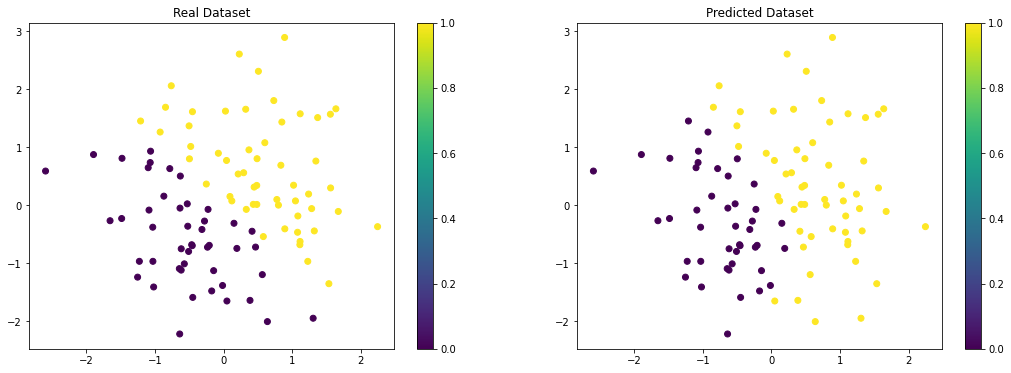

In [44]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)


### Bayesian Neural Network on the toy dataset, Make_moons

In [50]:
X ,y = datasets.make_moons(noise=0.2, random_state=0, n_samples=1000)

In [51]:
# We first convert the numpy array into a tensor
x,y  = torch.from_numpy(X).float(),torch.from_numpy(y).long()
x.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [52]:
for step in range(3000):
    pre = model(x)
    ce = ce_loss(pre,y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))



- Accuracy: 82.300000 %
- CE : 0.62, KL : 0.20


In [53]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

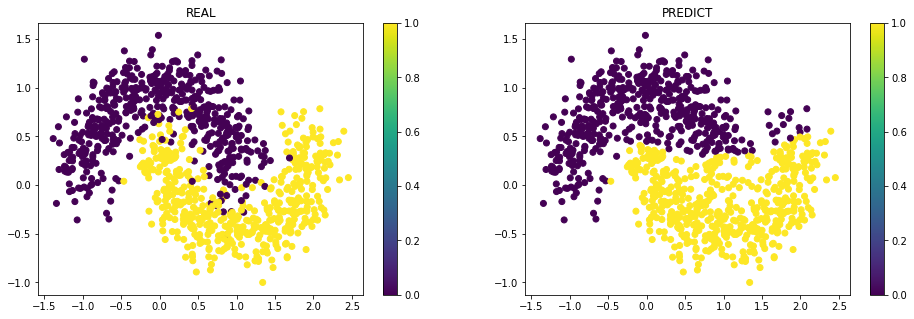

In [54]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

### Classical neural network¶

In [55]:
# We define the keras model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [56]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
X ,y = datasets.make_moons(noise=0.2, random_state=0, n_samples=1000)

In [58]:
# fit the keras model on the dataset

model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
100/100 [==============================] - 1s 3ms/step - loss: 0.7217 - accuracy: 0.3600
Epoch 2/150
100/100 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.7520
Epoch 3/150
100/100 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.8470
Epoch 4/150
100/100 [==============================] - 0s 4ms/step - loss: 0.3875 - accuracy: 0.8530
Epoch 5/150
100/100 [==============================] - 0s 4ms/step - loss: 0.3388 - accuracy: 0.8600
Epoch 6/150
100/100 [==============================] - 0s 4ms/step - loss: 0.3164 - accuracy: 0.8680
Epoch 7/150
100/100 [==============================] - 0s 4ms/step - loss: 0.3043 - accuracy: 0.8660
Epoch 8/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2964 - accuracy: 0.8650
Epoch 9/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8710
Epoch 10/150
100/100 [==============================] - 0s 2ms/step - loss: 0.2826 - accura

In [59]:
# We evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

32/32 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.9640
Accuracy: 96.40


Classical NN performs wit 97.30 accuracy on Meke_Moon non linear dataset

### **Multinomial Classification**

In [26]:
# We create an artificial dataset with 6 features and calculate its label with tanh function
X = np.random.randn(100, 6)
Y = np.tanh(X[:, 0] + X[:, 1]+ X[:, 2]+ X[:, 3]+ X[:, 4]+ X[:, 5])
Y = 1. / (1. + np.exp(-(Y + Y)))
Y = Y > 0.5

In [27]:
x, y = torch.from_numpy(X).float(), torch.from_numpy(Y).long()
x.shape, y.shape

(torch.Size([100, 6]), torch.Size([100]))

In [28]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=6, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=6),
)

In [29]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [30]:
for step in range(3000):
    pre = model(x)
    ce = ce_loss(pre,y)
    kl = kl_loss(model)
    cost = ce + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
_, predicted = torch.max(pre.data, 1)
total = y.size(0)
correct = (predicted == y).sum()
print('- Accuracy: %f %%' % (100 * float(correct) / total))
print('- CE : %2.2f, KL : %2.2f' % (ce.item(), kl.item()))

- Accuracy: 100.000000 %
- CE : 0.00, KL : 0.47


Bnn model performs with 100% accuracy in multinomial classification.

In [ ]:
def draw_plot(predicted) :
    fig = plt.figure(figsize = (16, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = y)
    z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = predicted)

    plt.colorbar(z1_plot,ax=ax1)
    plt.colorbar(z2_plot,ax=ax2)

    ax1.set_title("REAL")
    ax2.set_title("PREDICT")

    plt.show()

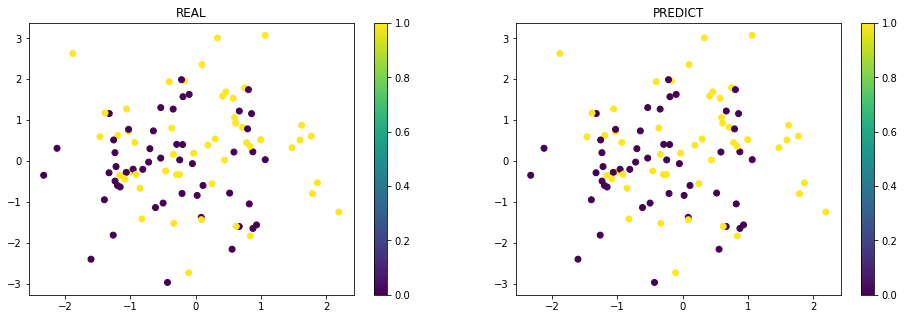

In [31]:
pre = model(x)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted)

### **Conclusion:**
## As we see that bayesian neural network classifies such datasets which are impossible to be linearly classified with a standard methods.